## **1. Ce que fait ce code**
- Ce programme utilise une intelligence artificielle (IA) pour apprendre à équilibrer un bâton sur un chariot dans un jeu appelé **CartPole-v1**.
- On commence par **regarder l’environnement** en action avec un agent qui joue au hasard.
- Ensuite, on entraîne une IA (agent PPO) pour **maîtriser le jeu**.
- Enfin, on observe l’agent entraîné jouer et réussir à garder le bâton en équilibre.

---

## **2. Installation des bibliothèques**
```python
!pip install gym gymnasium stable-baselines3
```
- **Pourquoi ?**
  - `gym` et `gymnasium` : Ces bibliothèques créent des environnements pour entraîner des agents, comme **CartPole**.
  - `stable-baselines3` : Une bibliothèque qui contient des algorithmes comme **PPO** pour entraîner des agents en apprentissage par renforcement.

---

## **3. Importation des bibliothèques**
```python
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import time
```
- **Pourquoi toutes ces bibliothèques ?**
  - `gym` : Pour créer et gérer notre environnement de jeu.
  - `PPO` : L’algorithme utilisé pour entraîner l’agent.
  - `DummyVecEnv` : Permet de gérer des environnements en parallèle (même si ici, on en utilise un seul).
  - `matplotlib` et `IPython` : Pour afficher les frames du jeu (images) pendant qu’il est joué.
  - `time` : Pour ajouter des pauses ou suivre le temps écoulé.

---

## **4. Création de l’environnement**
```python
env_name = 'CartPole-v1'
env = gym.make(env_name, render_mode='rgb_array')
```
- **Qu’est-ce que ça fait ?**
  - `env_name = 'CartPole-v1'` : On choisit le jeu **CartPole**, où le but est d’équilibrer un bâton.
  - `gym.make(env_name)` : On crée l’environnement du jeu.
  - `render_mode='rgb_array'` : On active l’affichage visuel pour voir l’agent jouer.

---

## **5. Fonction pour afficher les frames**
```python
def show_frame(frame):
    plt.figure(figsize=(8,6))
    plt.imshow(frame)
    plt.axis('off')
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    plt.close()
```
- **Qu’est-ce que ça fait ?**
  - Cette fonction prend une image (frame) et l’affiche joliment sans axes inutiles.
  - Elle nettoie l’écran à chaque nouveau frame pour montrer un mouvement fluide.

---

## **6. Observation d’un agent aléatoire**
```python
for episode in range(1, 10):
    score = 0
    state, _ = env.reset()
    done = False
    truncated = False

    while not (done or truncated):
        frame = env.render()
        show_frame(frame)
        action = env.action_space.sample()
        n_state, reward, done, truncated, info = env.step(action)
        score += reward

    print(f'Episode: {episode}, Score: {score}')
    time.sleep(2)
env.close()
```
- **Explication des étapes :**
  1. **`for episode in range(1, 10):`**  
     - On joue 9 parties (épisodes) pour observer l’environnement.
  2. **`env.reset()`**  
     - On réinitialise l’environnement pour chaque nouvelle partie.
  3. **`action = env.action_space.sample()`**  
     - On choisit une action **au hasard** (l’agent n’est pas encore intelligent).
  4. **`env.step(action)`**  
     - On effectue cette action dans le jeu et on récupère :
       - Le nouvel état (*n_state*).
       - La récompense (*reward*).
       - Si la partie est terminée (*done*).
       - Si elle a été coupée (*truncated*).
  5. **Afficher le score**  
     - Une fois la partie terminée, on affiche le score (nombre de frames où le bâton est resté en équilibre).

---

## **7. Entraînement de l’agent avec PPO**
```python
env = DummyVecEnv([lambda: gym.make(env_name)])
model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=20000)
model.save('/content/ppo_model')
```
- **Étapes clés :**
  1. **`DummyVecEnv`**  
     - On enveloppe l’environnement pour qu’il fonctionne bien avec `stable-baselines3` (même avec un seul environnement).
  2. **`PPO('MlpPolicy', env, verbose=1)`**  
     - On initialise un modèle PPO :
       - `MlpPolicy` : Une politique basée sur un réseau de neurones simple.
       - `verbose=1` : On affiche des informations pendant l’entraînement.
  3. **`model.learn(total_timesteps=20000)`**  
     - On entraîne l’agent pour 20 000 étapes de jeu.
  4. **`model.save('/content/ppo_model')`**  
     - On sauvegarde le modèle pour pouvoir le réutiliser plus tard.

---

## **8. Évaluation de l’agent entraîné**
```python
env = gym.make(env_name, render_mode='rgb_array')
obs, _ = env.reset()

for episode in range(1, 2):
    score = 0
    done = False
    truncated = False
    start_time = time.time()

    while not (done or truncated):
        frame = env.render()
        show_frame(frame)
        action, _ = model.predict(obs)
        obs, reward, done, truncated, info = env.step(action)
        score += reward

        if time.time() - start_time >= 20:
            print(f'Episode: {episode}, Score: {score} (Timed out after 20 seconds)')
            break

    if not (done or truncated):
        print(f'Episode: {episode}, Score: {score} (Completed)')

env.close()
```
- **Qu’est-ce que ça fait ?**
  - On recharge l’environnement pour observer notre **agent entraîné**.
  - À chaque étape, l’agent choisit une action basée sur ce qu’il a appris avec PPO (**`model.predict(obs)`**).
  - On observe si l’agent peut maintenir le bâton en équilibre et on affiche son score.

---

## **9. Résumé**

### **Avant l’entraînement :**  
- L’agent joue au hasard (choisit des actions au pif).  
- Résultat : Il échoue souvent, car il ne "sait" rien.

### **Pendant l’entraînement :**  
- L’agent utilise **PPO**, un algorithme d’apprentissage, pour apprendre :
  - Quels mouvements garderont le bâton en équilibre.
  - Ce qu’il doit éviter (faire tomber le bâton).

### **Après l’entraînement :**  
- L’agent peut jouer **comme un pro**, gardant le bâton en équilibre pendant longtemps.



In [2]:
!pip install gym gymnasium stable-baselines3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.3 MB/s eta 0:00:00


In [3]:
import gymnasium as gym
# Imports the Gymnasium library to create and interact with reinforcement learning environments.

from stable_baselines3 import PPO
# Imports the Proximal Policy Optimization (PPO) algorithm from Stable Baselines3.

from stable_baselines3.common.vec_env import DummyVecEnv
# Imports a wrapper to vectorize the environment for parallel processing of environments.

import matplotlib.pyplot as plt
# Imports matplotlib to create plots and display environment frames.

from IPython import display as ipythondisplay
# Imports display functions from IPython for clearing and showing environment frames in Jupyter notebooks.

import time
# Imports the time module to manage sleep intervals and timeouts.

In [4]:

env_name = 'CartPole-v1'
# Defines the name of the environment as 'CartPole-v1'.

env = gym.make(env_name, render_mode='rgb_array')
# Creates the CartPole-v1 environment in Gym with 'rgb_array' render mode for visualization.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:

# Function to display frames
def show_frame(frame):
    plt.figure(figsize=(8,6))
    # Sets the figure size for displaying the frame.

    plt.imshow(frame)
    # Displays the frame as an image.

    plt.axis('off')
    # Hides axis ticks and labels for a cleaner frame display.

    ipythondisplay.clear_output(wait=True)
    # Clears the previous output to prevent displaying multiple frames at once.

    ipythondisplay.display(plt.gcf())
    # Displays the current figure (frame) in the output.

    plt.close()
    # Closes the plot to avoid memory leaks.

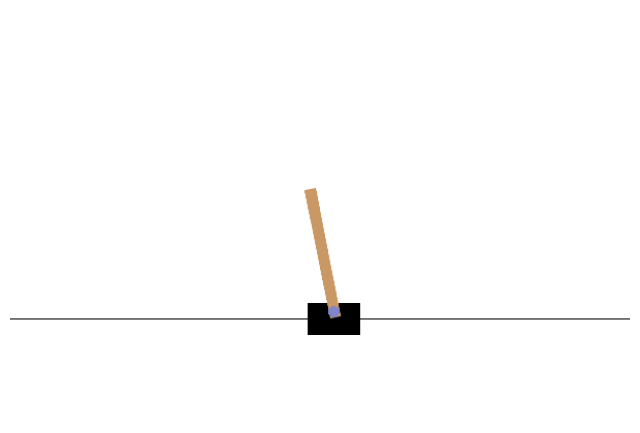

Episode: 9, Score: 19.0


In [6]:

# Random Agent Visualization
for episode in range(1, 10):
    score = 0
    # Initializes the score for each episode.

    state, _ = env.reset()
    # Resets the environment and gets the initial state for a new episode.

    done = False
    truncated = False
    # Flags to track if the episode is over or truncated.

    while not (done or truncated):
        frame = env.render()
        # Renders the current environment frame.

        show_frame(frame)
        # Displays the rendered frame.

        action = env.action_space.sample()
        # Samples a random action from the action space.

        n_state, reward, done, truncated, info = env.step(action)
        # Applies the sampled action to the environment and gets the next state, reward, and done/truncated flags.

        score += reward
        # Updates the score with the received reward.

    # Display the score after the episode ends
    print(f'Episode: {episode}, Score: {score}')
    # Prints the score after the episode finishes.

    time.sleep(2)
    # Pauses for 2 seconds before starting the next episode.

env.close()
# Closes the environment after all episodes are completed.

In [7]:
# Training the PPO agent
env = DummyVecEnv([lambda: gym.make(env_name)])
# Wraps the environment in a DummyVecEnv for parallelization (even if there’s only one environment).

model = PPO('MlpPolicy', env, verbose=1)
# Initializes a PPO model with a multilayer perceptron (MLP) policy.

model.learn(total_timesteps=20000)
# Trains the PPO agent for 20,000 time steps.

model.save('/content/ppo_model')
# Saves the trained PPO model to a file.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cuda device


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 379  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 383         |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008243034 |
|    clip_fraction        | 0.0884      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | -0.000748   |
|    learning_rate        | 0.0003      |
|    loss                 | 5.29        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0141     |
|    value_loss           | 49.7        |
-----------------------------------------
----------------------------------

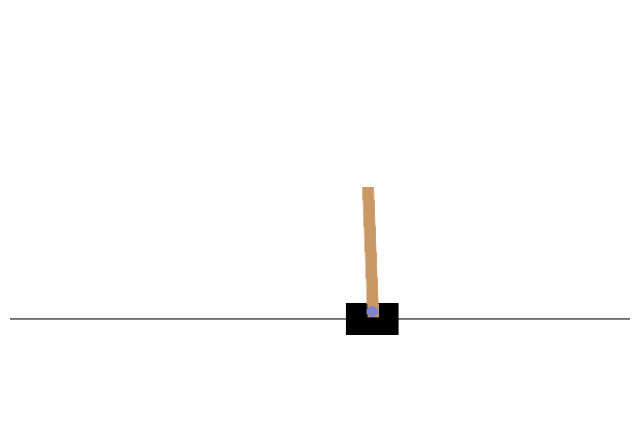

Episode: 1, Score: 125.0 (Timed out after 20 seconds)
Episode: 1, Score: 125.0 (Completed)


In [9]:
# Evaluate PPO Agent
env = gym.make(env_name, render_mode='rgb_array')
# Recreates the CartPole-v1 environment with rendering for evaluation.

obs, _ = env.reset()
# Resets the environment to get the initial observation.

for episode in range(1, 2):
    score = 0
    # Initializes the score for the evaluation episode.

    done = False
    truncated = False
    # Flags to track if the episode is over or truncated.

    start_time = time.time()
    # Records the start time of the episode to track timeout.

    while not (done or truncated):
        frame = env.render()
        # Renders the current frame of the environment.

        show_frame(frame)
        # Displays the rendered frame.

        action, _ = model.predict(obs)
        # Uses the trained PPO model to predict the best action based on the current observation.

        obs, reward, done, truncated, info = env.step(action)
        # Takes a step in the environment with the chosen action, getting the next observation and other information.

        score += reward
        # Updates the score with the received reward.

        if time.time() - start_time >= 20:
            # If more than 20 seconds have passed since the episode started.

            print(f'Episode: {episode}, Score: {score} (Timed out after 20 seconds)')
            # Prints the score and a message indicating the episode was timed out.

            break
            # Exits the loop.

    if not (done or truncated):
        # If the episode was not done or truncated by the environment.

        print(f'Episode: {episode}, Score: {score} (Completed)')
        # Prints the score and a message indicating the episode was completed normally.

env.close()
# Closes the environment after evaluation.



------------------------
------------------------

# **Programme complet commenté ligne par ligne : CartPole avec PPO**


#### **1. Installation des bibliothèques**
```python
!pip install gym gymnasium stable-baselines3
```
- **Pourquoi ?**
  - Ce programme utilise trois bibliothèques essentielles :
    - **`gym` et `gymnasium`** : Ces bibliothèques permettent de créer des environnements standards pour entraîner un agent d’apprentissage par renforcement (AR).  
    Exemple : CartPole, où un chariot doit équilibrer un bâton.
    - **`stable-baselines3`** : Une bibliothèque qui contient des algorithmes d’apprentissage par renforcement avancés comme PPO.

- **Que fait cette ligne ?**
  - Installe ces bibliothèques sur l’ordinateur ou dans Colab pour qu’on puisse les utiliser dans le programme.

---

#### **2. Importation des bibliothèques**
```python
import gymnasium as gym
```
- **Pourquoi ?**
  - `gym` permet de créer et gérer un **environnement** dans lequel un agent peut interagir.  
  Exemple : CartPole.

```python
from stable_baselines3 import PPO
```
- **Pourquoi ?**
  - On importe l’algorithme **Proximal Policy Optimization (PPO)**. C’est un algorithme d’apprentissage par renforcement qui aide un agent à apprendre en testant différentes actions tout en s’assurant de ne pas trop explorer les mauvaises.

```python
from stable_baselines3.common.vec_env import DummyVecEnv
```
- **Pourquoi ?**
  - Stable-Baselines3 nécessite que les environnements soient vectorisés, même si on n’utilise qu’un seul environnement.  
  **DummyVecEnv** est une enveloppe (wrapper) pour convertir un environnement simple en un environnement vectorisé.

```python
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import time
```
- **Pourquoi ?**
  - **`matplotlib`** : Pour afficher les images des frames du jeu.
  - **`IPython.display`** : Pour afficher chaque image dans un notebook Jupyter ou Colab.
  - **`time`** : Pour gérer les pauses entre les épisodes ou chronométrer une exécution.

---

#### **3. Création de l’environnement**
```python
env_name = 'CartPole-v1'
```
- **Que fait cette ligne ?**
  - On stocke le nom de l’environnement que l’on veut utiliser.  
  **CartPole-v1** est un environnement classique où un chariot doit équilibrer un bâton.

```python
env = gym.make(env_name, render_mode='rgb_array')
```
- **Que fait cette ligne ?**
  - On utilise `gym.make()` pour créer l’environnement CartPole.
  - **Paramètre `render_mode='rgb_array'`** :
    - Permet d’afficher visuellement l’environnement sous forme d’images (frames).

---

#### **4. Fonction pour afficher les frames**
```python
def show_frame(frame):
    plt.figure(figsize=(8,6))  # Définit la taille de l’image.
    plt.imshow(frame)          # Affiche l’image du jeu (frame actuelle).
    plt.axis('off')            # Supprime les axes pour rendre l’affichage plus propre.
    ipythondisplay.clear_output(wait=True)  # Efface l’ancienne frame (affichage propre).
    ipythondisplay.display(plt.gcf())       # Affiche la frame actuelle.
    plt.close()               # Ferme l’image pour éviter d’utiliser trop de mémoire.
```
- **Pourquoi ?**
  - Cette fonction prend une **image** en entrée et l’affiche joliment, sans axes ou distractions.
  - Elle rend le jeu fluide en remplaçant chaque image précédente par la nouvelle.

---

#### **5. Visualisation d’un agent aléatoire**
```python
for episode in range(1, 10):
```
- **Pourquoi ?**
  - On joue 9 épisodes pour **observer** comment l’environnement réagit à des actions aléatoires.

```python
    score = 0  # Initialisation du score (nombre de frames où le bâton reste en équilibre).
    state, _ = env.reset()  # Réinitialise l’environnement à l’état initial.
    done = False  # Flag pour suivre si la partie est terminée.
    truncated = False  # Flag si la partie est coupée (par exemple, dépassement du temps).
```

```python
    while not (done or truncated):  # Tant que la partie n’est pas terminée...
        frame = env.render()  # Récupère l’image actuelle (frame).
        show_frame(frame)  # Affiche la frame.
        action = env.action_space.sample()  # Choisit une action **au hasard**.
        n_state, reward, done, truncated, info = env.step(action)  # Exécute l’action dans l’environnement.
        score += reward  # Ajoute la récompense reçue au score.
```
- **Détails étape par étape :**
  - **`env.action_space.sample()`** : L’agent choisit une action au hasard parmi celles disponibles.
  - **`env.step(action)`** : L’environnement :
    1. Exécute l’action.
    2. Renvoie :
       - L’état suivant (*n_state*).
       - Une récompense (*reward*).
       - Si la partie est terminée (*done*).
       - D’autres informations (*info*).

```python
    print(f'Episode: {episode}, Score: {score}')  # Affiche le score de l’épisode.
    time.sleep(2)  # Pause de 2 secondes entre les épisodes.
```

---

#### **6. Entraînement de l’agent avec PPO**
```python
env = DummyVecEnv([lambda: gym.make(env_name)])
model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=20000)
model.save('/content/ppo_model')
```
- **Étapes expliquées :**
  1. **`DummyVecEnv([lambda: gym.make(env_name)])`** :  
     - Convertit l’environnement en une version compatible avec PPO.
  2. **`PPO('MlpPolicy', env, verbose=1)`** :  
     - Initialise un modèle PPO :
       - **`MlpPolicy`** : Utilise un réseau de neurones simple (Multilayer Perceptron).
       - **`verbose=1`** : Affiche les détails pendant l’entraînement.
  3. **`model.learn(total_timesteps=20000)`** :  
     - Entraîne l’agent pendant 20 000 étapes (frames).
  4. **`model.save()`** :  
     - Sauvegarde le modèle entraîné.

---

#### **7. Évaluation de l’agent entraîné**
```python
env = gym.make(env_name, render_mode='rgb_array')
obs, _ = env.reset()

for episode in range(1, 2):  # On évalue l’agent pour 1 épisode.
    score = 0
    done = False
    truncated = False
    start_time = time.time()  # Chronomètre pour limiter le temps d’un épisode.

    while not (done or truncated):
        frame = env.render()  # Récupère l’image actuelle.
        show_frame(frame)  # Affiche la frame.
        action, _ = model.predict(obs)  # L’agent choisit la meilleure action selon son modèle.
        obs, reward, done, truncated, info = env.step(action)  # Exécute l’action choisie.
        score += reward  # Ajoute la récompense.

        if time.time() - start_time >= 20:  # Si l’épisode dure plus de 20 secondes.
            print(f'Episode: {episode}, Score: {score} (Timed out after 20 seconds)')
            break  # Arrête l’épisode.

    if not (done or truncated):
        print(f'Episode: {episode}, Score: {score} (Completed)')

env.close()  # Ferme l’environnement après évaluation.
```

---

### **Résumé**
1. **Agent aléatoire** :
   - Joue au hasard et échoue souvent (ne comprend rien).
2. **Entraînement avec PPO** :
   - L’agent apprend progressivement quelles actions garderont le bâton en équilibre.
3. **Agent entraîné** :
   - Joue comme un pro et maintient le bâton en équilibre pendant longtemps.
